# Pandas Visualization

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### Reading DataFrame

In [21]:
file = "tcl.csv"

df = pd.read_csv(file, sep=";")
df = df.set_index("year")
df.head()

,team,played,won,drawn,lost,goals_for,goals_against,goal_difference,points
year,,,,,,,,,
1959,Fenerbahce,16,13,2,1,33,8,25,28
1960,Besiktas,38,29,7,2,68,15,53,65
1961,Fenerbahce,38,26,9,3,81,29,52,61
1962,Galatasaray,38,23,11,4,52,18,34,57
1963,Galatasaray,22,14,7,1,54,14,40,35


In [18]:
won = df.groupby("team")[["won"]].sum

60

In [22]:
fb = df[df.team == "Fenerbahce"]
fb = fb.drop(["team"], axis=1)
fb

,played,won,drawn,lost,goals_for,goals_against,goal_difference,points
year,,,,,,,,
1959,16,13,2,1,33,8,25,28
1961,38,26,9,3,81,29,52,61
1964,34,21,11,2,55,14,41,53
1965,30,18,11,1,52,13,39,47
1968,32,19,11,2,38,12,26,49
1970,30,17,10,3,31,6,25,44
1974,30,15,13,2,39,15,24,43
1975,30,15,13,2,43,18,25,43
1978,30,17,8,5,48,24,24,42


In [24]:
gs = df[df.team == "Galatasaray"]
gs = gs.drop(["team"], axis=1)
bjk = df[df.team == "Besiktas"]
bkj = bjk.drop(["team"], axis=1)

In [38]:
champs_lst = ["fb", "gs", "bjk"]
total_champ = {}
for team in champs_lst:
    total_champ[team] = len(eval(team))

In [39]:
total_champ

{'fb': 19, 'gs': 21, 'bjk': 13}

In [48]:
champ_df = pd.DataFrame.from_dict(total_champ,orient='index')
champ_df = champ_df.T
champ_df

,fb,gs,bjk
0,19,21,13


<IPython.core.display.Javascript object>


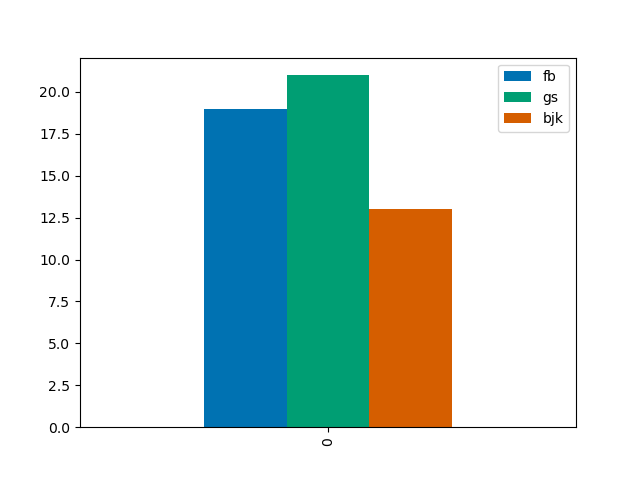

In [45]:
champ_df.plot(kind="bar")

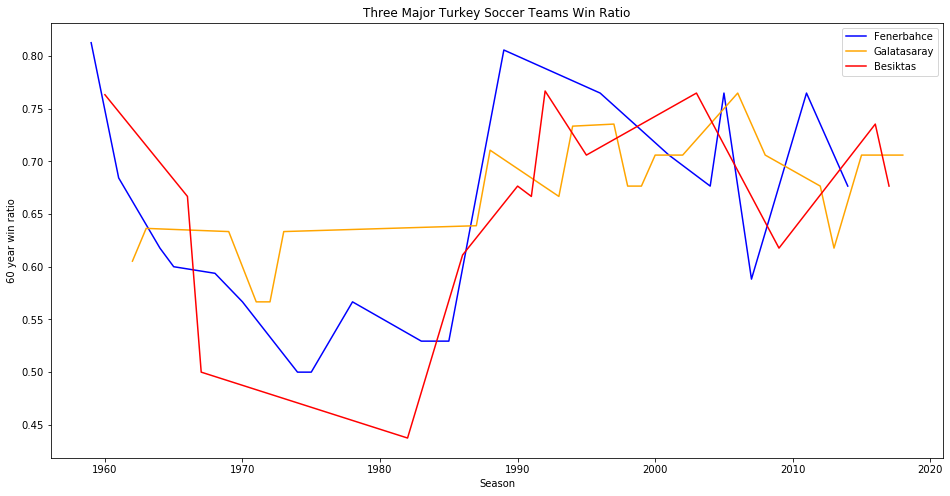

In [72]:
fb_win_ratio = []
gs_win_ratio = []
bjk_win_ratio = []

for idx, row in fb.iterrows():
    win_ratio = row["won"]/row["played"]
    fb_win_ratio.append((idx, win_ratio))
    
fb_year, fb_win_r = zip(*fb_win_ratio)


for idx, row in gs.iterrows():
    win_ratio = row["won"]/row["played"]
    gs_win_ratio.append((idx, win_ratio))
    
gs_year, gs_win_r = zip(*gs_win_ratio)

for idx, row in bjk.iterrows():
    win_ratio = row["won"]/row["played"]
    bjk_win_ratio.append((idx, win_ratio))
    
bjk_year, bjk_win_r = zip(*bjk_win_ratio)

plt.figure(figsize=(16,8))
plt.plot(fb_year, fb_win_r, color="blue", label="Fenerbahce")
plt.plot(gs_year, gs_win_r, color="orange", label="Galatasaray")
plt.plot(bjk_year, bjk_win_r, color="red", label = "Besiktas")

plt.title("Three Major Turkey Soccer Teams Win Ratio")
plt.xlabel("Season")
plt.ylabel("60 year win ratio")
plt.legend()
plt.show()